In [1]:
import calendar
import warnings
from datetime import datetime

import japanize_matplotlib
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

pd.set_option("display.max_columns", 100)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [2]:
american2011 = pd.read_csv("american2011.csv")
american2013 = pd.read_csv("american2013.csv")
american2014 = pd.read_csv("american2014.csv")
american2015 = pd.read_csv("american2015.csv")
american2022 = pd.read_csv("american2022.csv")
american2023 = pd.read_csv("american2023.csv")

american2011["Year"] = 2011
american2013["Year"] = 2013
american2014["Year"] = 2014
american2015["Year"] = 2015
american2022["Year"] = 2022
american2023["Year"] = 2023

In [3]:
data_frames = [american2011, american2013, american2014, american2015, american2022, american2023]
years = [2011, 2013, 2014, 2015, 2022, 2023]

total_hits_all_years = pd.concat(data_frames).groupby(['Year', 'Name'])['H'].sum().reset_index()

for i in range(len(data_frames)):
    data_frames[i]["Year"] = years[i]
    data_frames[i]["Game_ID"] = data_frames[i].groupby(["Name"]).cumcount() + 1
    data_frames[i] = data_frames[i][
        data_frames[i]["Game_ID"] <= 60
    ]

    data_frames[i] = data_frames[i].groupby(['Year', 'Name']).agg({
        "AB": "sum",
        "R": "sum",
        "H": "sum",
        "TB": "sum",
        "2B": "sum",
        "3B": "sum",
        "HR": "sum",
        "RBI": "sum",
        "BB": "sum",
        "IBB": "sum",
        "SO": "sum",
        "SB": "sum",
        "CS": "sum",
    }).reset_index()
    data_frames[i] = data_frames[i].merge(total_hits_all_years, on=['Year', 'Name'], suffixes=('', '_total'))
    data_frames[i] = data_frames[i].drop(columns='H')

In [4]:
data_2011 = data_frames[0]
data_2013 = data_frames[1]
data_2014 = data_frames[2]
data_2015 = data_frames[3]
data_2022 = data_frames[4]
data_2023 = data_frames[5]

In [5]:
data_2011

,Year,Name,AB,R,TB,2B,3B,HR,RBI,BB,IBB,SO,SB,CS,H_total
0,2011,Adam Jones,227,29,104,10,1,8,32,12,2,40,5,0,159
1,2011,Adrián Beltré,231,32,104,14,0,11,43,15,0,23,0,1,144
2,2011,Adrián González,247,40,142,18,2,12,51,20,5,42,1,0,213
3,2011,Alberto Jose Callaspo,224,21,85,11,0,3,28,24,4,18,1,0,137
4,2011,Alcides Escobar,212,21,50,7,0,0,13,9,0,27,6,4,139
5,2011,Alex Gordon,246,38,114,18,3,7,31,25,1,55,5,2,185
6,2011,Alexei Ramirez,239,37,105,15,1,6,31,21,1,33,2,2,165
7,2011,Asdrúbal Cabrera,248,40,132,15,3,12,42,14,1,39,7,0,165
8,2011,Austin Jackson,235,30,84,11,3,3,17,21,2,71,9,2,147
9,2011,Ben Zobrist,227,35,106,17,2,9,34,26,1,50,6,1,158


In [6]:
LRmodel_2011 = LinearRegression()
LRmodel_2011.fit(data_2011.drop(columns=["Name", "Year", "H_total"]), data_2011["H_total"])
LRmodel_2013 = LinearRegression()
LRmodel_2013.fit(data_2013.drop(columns=["Name", "Year", "H_total"]), data_2013["H_total"])
LRmodel_2014 = LinearRegression()
LRmodel_2014.fit(data_2014.drop(columns=["Name", "Year", "H_total"]), data_2014["H_total"])
LRmodel_2015 = LinearRegression()
LRmodel_2015.fit(data_2015.drop(columns=["Name", "Year", "H_total"]), data_2015["H_total"])

LGBmodel_2011 = lgb.LGBMRegressor()
LGBmodel_2011.fit(data_2011.drop(columns=["Name", "Year", "H_total"]), data_2011["H_total"])
LGBmodel_2013 = lgb.LGBMRegressor()
LGBmodel_2013.fit(data_2013.drop(columns=["Name", "Year", "H_total"]), data_2013["H_total"])
LGBmodel_2014 = lgb.LGBMRegressor()
LGBmodel_2014.fit(data_2014.drop(columns=["Name", "Year", "H_total"]), data_2014["H_total"])
LGBmodel_2015 = lgb.LGBMRegressor()
LGBmodel_2015.fit(data_2015.drop(columns=["Name", "Year", "H_total"]), data_2015["H_total"])

X_test = data_2022.drop(columns=["Name", "Year", "H_total"])

LRpreds_2011 = LRmodel_2011.predict(X_test)
LRpreds_2013 = LRmodel_2013.predict(X_test)
LRpreds_2014 = LRmodel_2014.predict(X_test)
LRpreds_2015 = LRmodel_2015.predict(X_test)

LGBpreds_2011 = LGBmodel_2011.predict(X_test)
LGBpreds_2013 = LGBmodel_2013.predict(X_test)
LGBpreds_2014 = LGBmodel_2014.predict(X_test)
LGBpreds_2015 = LGBmodel_2015.predict(X_test)

LRfinal_preds = (LRpreds_2011 + LRpreds_2013 + LRpreds_2014 + LRpreds_2015) / 4.0
LGBfinal_preds = (LGBpreds_2011 + LGBpreds_2013 + LGBpreds_2014 + LGBpreds_2015) / 4.0

## Linear Regression

In [7]:
# # Linear Regression
# data_2022["Predicted_H_total"] = LRfinal_preds
# sorted_data_2022 = data_2022.sort_values(by='H_total', ascending=False).reset_index(drop=True)
# sorted_data_2022

In [8]:
# models = [LRmodel_2011, LRmodel_2013, LRmodel_2014, LRmodel_2015]
# years = [2011, 2013, 2014, 2015]
# data = [data_2011, data_2013, data_2014, data_2015]

# for i, model in enumerate(models):
#     y_true = data[i]["H_total"]
#     y_pred = model.predict(data[i].drop(columns=["Name", "Year", "H_total"]))

#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_true, y_pred)

#     print(f"LGBModel {years[i]} Evaluation:")
#     print(f"LGB_MAE: {mae}")
#     print(f"LGB_MSE: {mse}")
#     print(f"LGB_RMSE: {rmse}")
#     print(f"LGB_R^2: {r2}")
#     print("-------------------------")

# y_true_final = data_2022["H_total"]
# y_pred_final = data_2022["Predicted_H_total"]

# mae_final = mean_absolute_error(y_true_final, y_pred_final)
# mse_final = mean_squared_error(y_true_final, y_pred_final)
# rmse_final = np.sqrt(mse_final)
# r2_final = r2_score(y_true_final, y_pred_final)

# print("Final Model Evaluation:")
# print(f"LGB_MAE: {mae_final}")
# print(f"LGB_MSE: {mse_final}")
# print(f"LGB_RMSE: {rmse_final}")
# print(f"LGB_R^2: {r2_final}")
# print("-------------------------")

# plt.figure(figsize=(10, 8))
# plt.scatter(y_true_final, y_pred_final, color='blue')
# plt.plot([y_true_final.min(), y_true_final.max()], [y_true_final.min(), y_true_final.max()], 'k--', lw=4)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted Total Hits for Year 2023')
# plt.show()

In [9]:
# X_test = data_2023.drop(columns=["Name", "Year", "H_total"])

# preds_2011 = LRmodel_2011.predict(X_test)
# preds_2013 = LRmodel_2013.predict(X_test)
# preds_2014 = LRmodel_2014.predict(X_test)
# preds_2015 = LRmodel_2015.predict(X_test)

# final_preds = (preds_2011 + preds_2013 + preds_2014 + preds_2015) / 4.0
# data_2023["Predicted_H_total"] = final_preds
# sorted_data_2023 = data_2023.sort_values(by='Predicted_H_total', ascending=False).reset_index(drop=True)
# sorted_data_2023

## LightGBM

In [10]:
# LightGBM
data_2022["Predicted_H_total"] = LGBfinal_preds
sorted_data_2022 = data_2022.sort_values(by='H_total', ascending=False).reset_index(drop=True)
sorted_data_2022

,Year,Name,AB,R,TB,2B,3B,HR,RBI,BB,IBB,SO,SB,CS,H_total,Predicted_H_total
0,2022,Bo Joseph Bichette,252,34,113,15,0,10,32,17,0,63,4,3,189,170.643365
1,2022,José Dariel Abreu,228,34,102,14,0,9,30,33,0,44,0,0,183,152.082654
2,2022,German Amed Rosario,248,34,93,10,4,2,18,11,0,37,8,1,180,165.043882
3,2022,David Nathaniel Lowe,226,26,97,9,1,8,26,15,1,60,1,1,179,148.141889
4,2022,Aaron James Judge,230,53,157,10,0,25,49,29,5,66,3,0,177,159.664814
5,2022,Vladimir Guerrero Jr.,224,31,110,7,0,15,37,27,4,43,0,1,175,156.088757
6,2022,Luis Sangel Arraez,214,38,96,8,0,4,25,28,1,20,2,1,173,156.070147
7,2022,Xander Jan Bogaerts,223,37,108,17,0,6,28,23,1,50,3,0,171,162.175583
8,2022,Steven Kwan,205,32,76,8,3,1,18,27,1,18,5,2,168,156.316872
9,2022,José Enrique Ramírez,226,41,145,20,4,16,62,34,5,20,11,3,168,169.129188


LGBModel 2011 Evaluation:
LGB_MAE: 11.481507832521464
LGB_MSE: 224.14910653215807
LGB_RMSE: 14.971610018036072
LGB_R^2: 0.5062625084130746
-------------------------
LGBModel 2013 Evaluation:
LGB_MAE: 10.925924530849898
LGB_MSE: 169.80954485760708
LGB_RMSE: 13.031099142344328
LGB_R^2: 0.4585873020109351
-------------------------
LGBModel 2014 Evaluation:
LGB_MAE: 11.2512945515907
LGB_MSE: 192.54106857908795
LGB_RMSE: 13.875916855440146
LGB_R^2: 0.5079808452974842
-------------------------
LGBModel 2015 Evaluation:
LGB_MAE: 11.034345395591629
LGB_MSE: 177.03688488035618
LGB_RMSE: 13.305520842130013
LGB_R^2: 0.3032889244018061
-------------------------
Final Model Evaluation:
LGB_MAE: 15.409919989092552
LGB_MSE: 306.7771705837892
LGB_RMSE: 17.515055540414057
LGB_R^2: -0.08205451372981498
-------------------------


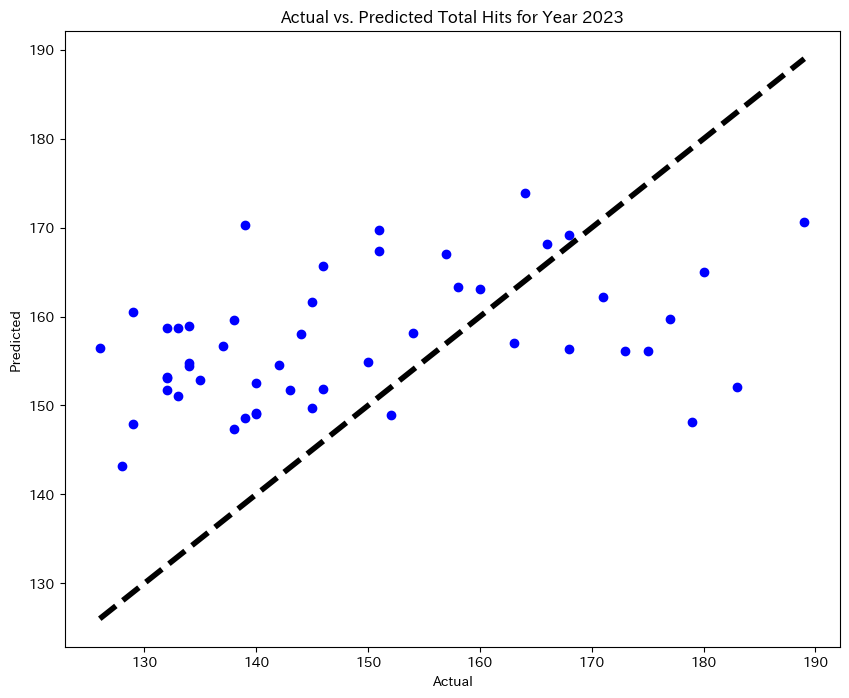

In [11]:
models = [LGBmodel_2011, LGBmodel_2013, LGBmodel_2014, LGBmodel_2015]
years = [2011, 2013, 2014, 2015]
data = [data_2011, data_2013, data_2014, data_2015]

for i, model in enumerate(models):
    y_true = data[i]["H_total"]
    y_pred = model.predict(data[i].drop(columns=["Name", "Year", "H_total"]))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"LGBModel {years[i]} Evaluation:")
    print(f"LGB_MAE: {mae}")
    print(f"LGB_MSE: {mse}")
    print(f"LGB_RMSE: {rmse}")
    print(f"LGB_R^2: {r2}")
    print("-------------------------")

y_true_final = data_2022["H_total"]
y_pred_final = data_2022["Predicted_H_total"]

mae_final = mean_absolute_error(y_true_final, y_pred_final)
mse_final = mean_squared_error(y_true_final, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_true_final, y_pred_final)

print("Final Model Evaluation:")
print(f"LGB_MAE: {mae_final}")
print(f"LGB_MSE: {mse_final}")
print(f"LGB_RMSE: {rmse_final}")
print(f"LGB_R^2: {r2_final}")
print("-------------------------")

plt.figure(figsize=(10, 8))
plt.scatter(y_true_final, y_pred_final, color='blue')
plt.plot([y_true_final.min(), y_true_final.max()], [y_true_final.min(), y_true_final.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Total Hits for Year 2023')
plt.show()


In [12]:
X_test = data_2023.drop(columns=["Name", "Year", "H_total"])

preds_2011 = LGBmodel_2011.predict(X_test)
preds_2013 = LGBmodel_2013.predict(X_test)
preds_2014 = LGBmodel_2014.predict(X_test)
preds_2015 = LGBmodel_2015.predict(X_test)

final_preds = (preds_2011 + preds_2013 + preds_2014 + preds_2015) / 4.0
data_2023["Predicted_H_total"] = final_preds
sorted_data_2023 = data_2023.sort_values(by='Predicted_H_total', ascending=False).reset_index(drop=True)
sorted_data_2023


,Year,Name,AB,R,TB,2B,3B,HR,RBI,BB,IBB,SO,SB,CS,H_total,Predicted_H_total
0,2023,José Ramírez,236,36,118,18,2,10,37,28,11,23,5,3,73,178.816200
1,2023,Wander Franco,238,39,116,19,2,7,29,23,1,33,22,5,80,177.397526
2,2023,Steven Kwan,240,37,84,14,1,2,18,29,2,32,10,1,68,174.728778
3,2023,Marcus Semien,250,55,126,19,2,9,50,28,1,41,7,1,81,173.039766
4,2023,Alex Verdugo,236,42,106,19,2,5,24,25,1,36,3,2,75,173.027356
5,2023,Rafael Calcano Devers,235,31,111,15,0,13,50,17,2,53,0,1,63,171.963376
6,2023,Salvador Johan Perez,236,31,121,14,0,14,37,8,3,55,0,0,132,171.891866
7,2023,Nathaniel Lowe,241,44,108,17,1,7,37,28,1,55,0,0,74,171.563335
8,2023,Masataka Yoshida,232,34,107,15,1,7,33,25,0,28,3,0,69,169.459536
9,2023,Vladimir Guerrero Jr.,236,30,108,14,0,9,38,22,0,41,3,0,74,167.197247
